# Data Inspection

Action items: `TODO`, `QUESTION`

#### Structure of this notebook:  
    **Exploring the data and descriptive statistics:**   

    A. Package and Data Load  
    B. Understanding the Likers & Retweeters datasets  
    C. Understanding script performance
    D. Understanding user activity

# A. Package and Data Load
Specify your data directory in this secion (`my_pull`).

In [2]:
import os
import glob
import json
import pandas as pd
import csv
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import itertools
from matplotlib import pyplot as plt
from collections import Counter
from ast import literal_eval
newest_pull_directory = max(glob.glob('../Pull*'), key=os.path.getmtime)

`my_pull`: Set the data directory you want to inspect, e.g. Pull-DD-MM-YYYY-hour:minute:second, or use the newest by setting `my_pull = newest_pull_directory`.

In [3]:
my_pull = newest_pull_directory
my_pull

'../Pull'

Load the data:

In [4]:
likers = pd.read_pickle(os.path.join(my_pull,'binary-matrix-likers.pkl'))
retweeters = pd.read_pickle(os.path.join(my_pull,'binary-matrix-retweeters.pkl'))
likers_complete = likers
retweeters_complete = retweeters
finalharvest_l = pd.read_pickle(os.path.join(my_pull,'likers_final_harvest_complete.pkl'))
finalharvest_r = pd.read_pickle(os.path.join(my_pull,'retweeters_final_harvest_complete.pkl'))
finalharvest_l.index.names = ['tweet']
finalharvest_r.index.names = ['tweet']


# B. Exploring

Let us look at the dataset of liking users, stored in  `likers`. In `likers`, the row index is tweet ID and the column names are user names. A cell contains `1` if the user liked the tweet, else `NaN`. Both rows and columns are sorted: rows numerically, columns alphabetically. The `retweeters` and `finalharvest_` dataframes are structured in the same way.

The next cells are examples of the following:

1. As the index is the tweet ID, we can look up a single tweet by using its ID, using `.loc`.
2. To find some tweet IDs, we may want to look up at the subsection of the first 3 tweets and the first 5 users, using `.iloc`.
3. TODO: List of linking users of a single tweet.

In [5]:
likers.loc[1537712147500781569]

00Skibsted         NaN
0neNin3Sierra      NaN
0ppermann          NaN
1000Tusindfryd     NaN
10ralphjade10      1.0
                  ... 
zeeemonnn          NaN
zevo_bte           NaN
zoega_b            NaN
zootopiavivared    NaN
zu_gabby           NaN
Name: 1537712147500781569, Length: 10530, dtype: float64

In [6]:
likers.iloc[0:3,0:5]

,00Skibsted,0neNin3Sierra,0ppermann,1000Tusindfryd,10ralphjade10
tweet,,,,,
1537359512163831808,NaN,NaN,NaN,NaN,NaN
1537360344863195136,NaN,NaN,NaN,NaN,NaN
1537360508596195330,NaN,NaN,NaN,NaN,NaN


## Summary Numbers

TODO: Write text

QUESTION: I've commented out the sanity checkes, as I assume they were for us?

TODO: Comment in or delete.checkes

In [7]:
totals = pd.DataFrame()
totals.loc[1,'Tweets Liked'] = likers.shape[0]
totals.loc[1,'Likers'] = likers.shape[1]
totals.loc[1,'Likes'] = sum(likers.sum(axis = 1, skipna = True))
#totals.loc[1,'Sanity Check 1'] = sum(likers.sum(axis = 0, skipna = True))
totals.loc[1,'Tweets Retweeted'] = retweeters.shape[0]
totals.loc[1,'Retweeters'] = retweeters.shape[1]
totals.loc[1,'Retweets'] = sum(retweeters.sum(axis = 1, skipna = True))
#totals.loc[1,'Sanity Check 2'] = sum(retweeters.sum(axis = 0, skipna = True))
totals

,Tweets Liked,Likers,Likes,Tweets Retweeted,Retweeters,Retweets
1,1308.0,10530.0,28560.0,644.0,1802.0,3206.0


QUESTION: **Is the below correct?**

I refrained from putting it in the table as I'm not sure: I might misread the code, but doesn't the below tell us how many tweets *ought to have been* checked in the final harvest, not how many *actually were*? Maybe the two cannot differ?

TODO: Add to table or fix and add to table or delete

In [8]:
# How many tweets were subject to collection in the final harvest of likers?: those tweets that were subject to final data collection 
# in the final harvest (see parameters my_likersAtLeast)
my_likersAtLeast = # SET PARAMETER HERE
sum(numberlikes_rows >= my_likersAtLeast) 
# this is the number of tweets with at least my_likersAtLeast likes
#
# How many tweets were subject to collection in the final harvest of retweeters?: those tweets that were subject to final data collection 
# in the final harvest (see parameters my_retweetersAtLeast)
my_retweetersAtLeast = # SET PARAMETER HERE
sum(numberretweets_rows>=my_retweetersAtLeast) 
# this is the number of tweets with at least my_retweetersAtLeast retweets

SyntaxError: invalid syntax (2788636158.py, line 3)

## C. Understanding script performance
### How many likers/retweeters did the script curate? Dataset comprising those tweets that were one last time collected in the final harvest

In [9]:
subset_likerscomplete = pd.merge(likers_complete, finalharvest_l, left_index=True, right_index=True)
subset_retweeterscomplete = pd.merge(retweeters_complete, finalharvest_r, left_index=True, right_index=True)

In [10]:
# like count at time of final harvest
likecount = finalharvest_l['like_count']
# number of collected likers 
likerscollected = subset_likerscomplete.sum(axis = 1, skipna = True) 
# retweet count at time of final harvest
retweetcount = finalharvest_r['retweet_count']
# number of collected retweeters
retweeterscollected = subset_retweeterscomplete.sum(axis = 1, skipna = True) 

Text(0, 0.5, 'Likes/retweeters not collected')

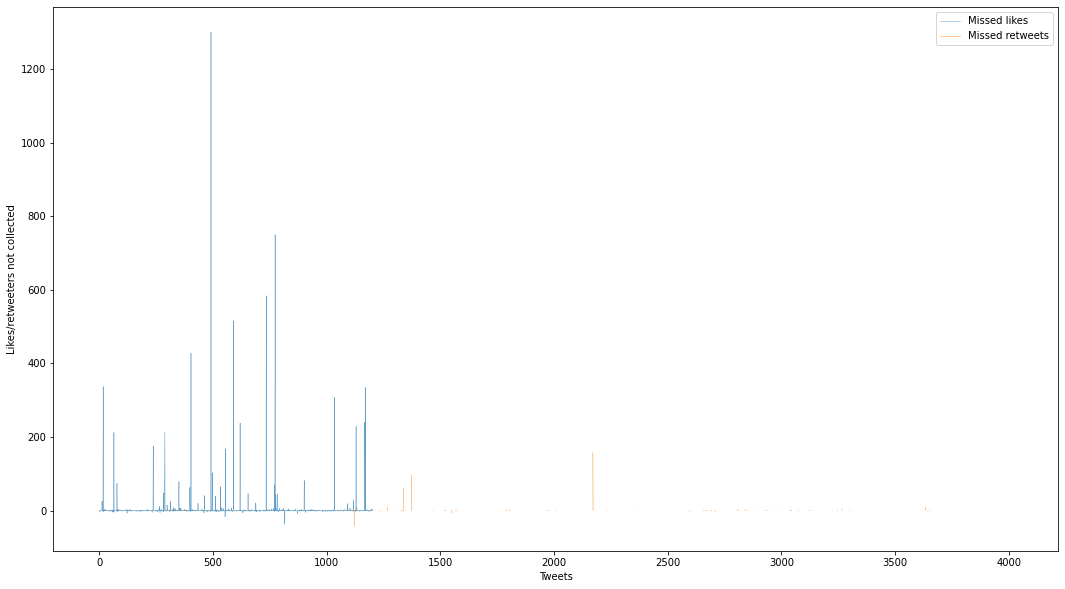

In [11]:
# Absolute number of missed likes/retweets per tweet
fig, ax = plt.subplots(figsize =(18, 10)) 

plt.plot(list(range(0,len(likecount),1)),likecount-likerscollected, label = 'Missed likes', alpha = 0.7, linewidth = .5)
plt.plot(list(range(0,len(retweetcount),1)),retweetcount-retweeterscollected, label = 'Missed retweets', alpha = 0.9, linewidth = .5)
plt.legend(loc="upper right", prop={'size': 10})

ax.set_xlabel("Tweets")
ax.set_ylabel('Likes/retweeters not collected')

Text(0, 0.5, 'Share of likers/retweeters per tweet not collected')

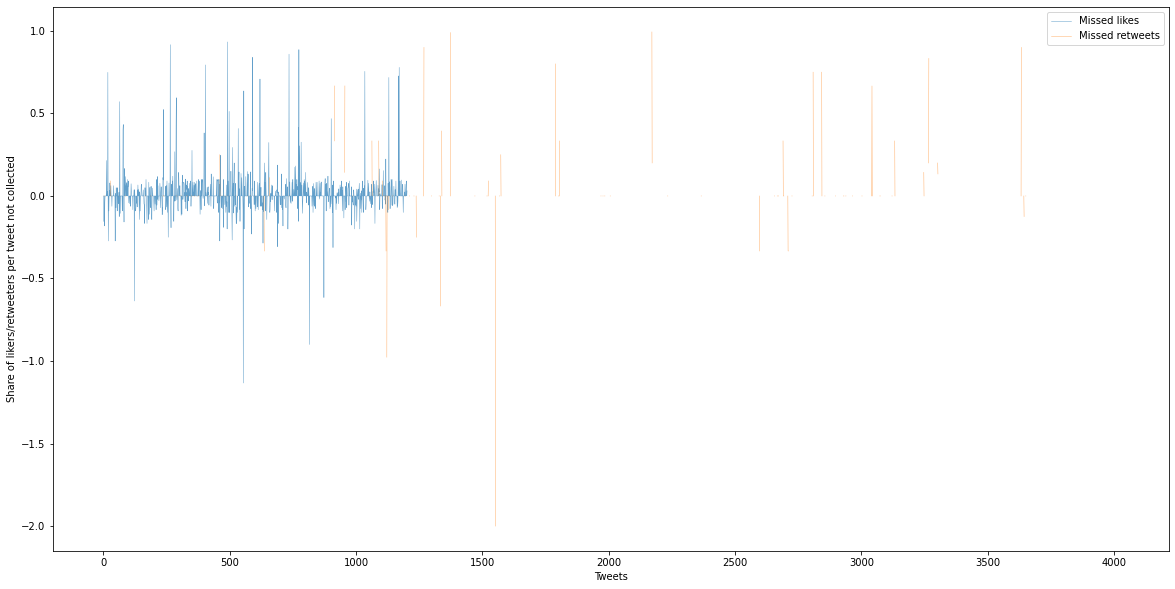

In [13]:
# Share of missed likes/retweets given total of received likes/retweets per tweet
fig, ax = plt.subplots(figsize =(20, 10)) 

plt.plot(list(range(0,len(likecount),1)),((likecount-likerscollected)/likecount), label = 'Missed likes', alpha = 0.7, linewidth = .5)
plt.plot(list(range(0,len(retweetcount),1)),((retweetcount-retweeterscollected)/retweetcount), label = 'Missed retweets', alpha = 0.6, linewidth = .5)

plt.legend(loc="upper right", prop={'size': 10})

ax.set_xlabel("Tweets")
ax.set_ylabel('Share of likers/retweeters per tweet not collected')

TODO: 'likesseries' not defined.

NameError: name 'likesseries' is not defined

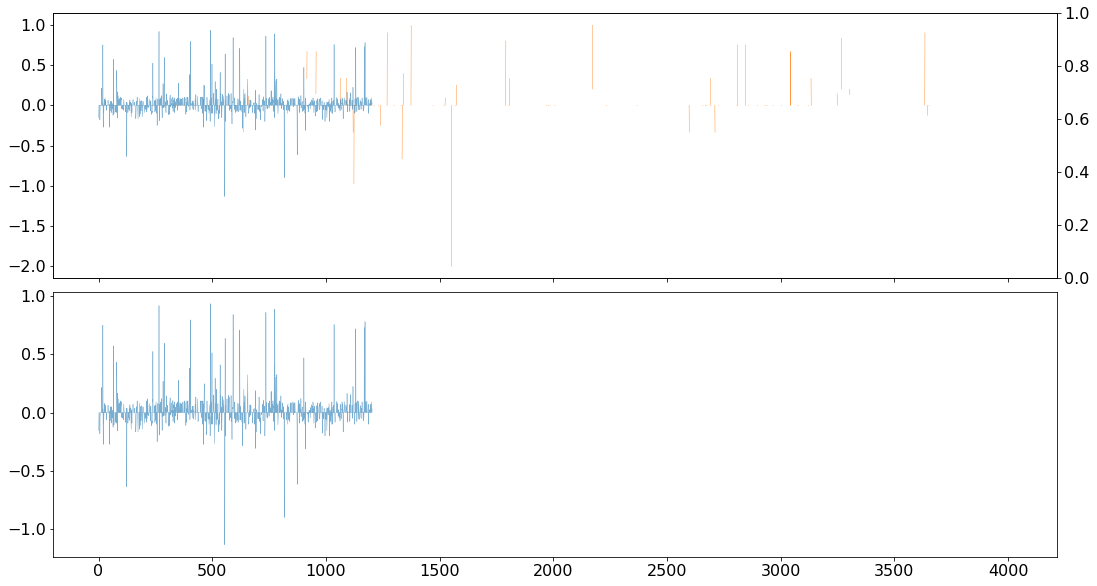

In [14]:
# Supplemented with total number of likes/retweets each tweet attracted: 
xvalretweeters = list(range(1,len(retweetcount)+1,1))
xvallikers= list(range(1,len(likecount)+1,1))

SMALL_SIZE = 8
MEDIUM_SIZE = 16
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize =(18, 10))

fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes (broken axis can accomodate for outliers this way)
ax1.plot(xvalretweeters, (retweetcount-retweeterscollected)/retweetcount, label = 'retweets', alpha = .8, color='tab:orange', linewidth = 0.5)
ax1.plot(xvallikers, (likecount-likerscollected)/likecount, label = 'likes', alpha = .6, color = 'tab:blue', linewidth=.5)


ax2.plot(xvallikers, (likecount-likerscollected)/likecount, label = 'Received likes', alpha = 0.6, color = 'tab:blue', linewidth = .5)
ax3 = ax1.twinx()
ax3.plot(xvallikers, likesseries, label = 'Received likes', alpha = 0.8, color = 'tab:blue', linestyle='dotted')
ax3.plot(xvalretweeters, retweetsseries, label = 'Received retweets', alpha = 0.8, color = 'tab:orange', linestyle='dotted')

ax2.set_xlabel("Tweets")


# zoom-in / limit the view to different portions of the data
ax2.set_ylim(-4.09, -4.0)  # outliers only
ax1.set_ylim(-1.3, .7)  # most of the data (-1.3, .7

    # hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax3.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False)  # don't put tick labels at the top

ax2.xaxis.tick_bottom()

d = .2  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_ylabel('Share of likes/retweets not collected (lines)')
ax3.set_ylabel('Received likes/retweets (dotted)')

ax1.legend(['Retweets', 'Likes'], loc = 'upper right',  prop={'size': 13})

plt.savefig('howmanymissed.pdf', bbox_inches='tight')

In [ ]:
# inspect numbers more closely
d = {'collectedlikers': likerscollected, 'likecount': likecount, 'difference': likecount-likerscollected, 'percent': ((likecount-likerscollected)/likecount)}
inspectlikes = pd.DataFrame(data=d)
inspectlikes

In [ ]:
# inspect numbers more closely
d = {'collectedretweeters': retweeterscollected, 'retweetcount': retweetcount, 'difference': retweetcount-retweeterscollected, 'percent': ((retweetcount-retweeterscollected)/retweetcount)}
inspectretweets = pd.DataFrame(data=d)
inspectretweets

In [ ]:
# *retracted likes*
# In <len(neg)/len(inspectlikes)> % the script collects 10 likes or more too many
neg = inspectlikes[inspectlikes['difference'] <-10]
len(neg)/len(inspectlikes) 

In [ ]:
# *retracted retweets*
# In <len(neg)/len(inspectretweets)> the script collects 10 retweets or more too many
neg = inspectretweets[inspectretweets['difference'] <-10]
len(neg)/len(inspectretweets) 

In [ ]:
# *likes placed in large, simulanous batches* 
# In <len(pos)/len(inspectlikes)> % of tweets the script misses out on 10 or more likes
pos = inspectlikes[inspectlikes['difference'] >10]
len(pos)/len(inspectlikes)

In [ ]:
# *retweets placed in large, simulanous batches* 
# In <len(pos)/len(inspectretweets)> % of tweets the script misses out on 10 or more retweets
pos = inspectretweets[inspectretweets['difference'] >10]
len(pos)/len(inspectretweets)

In [ ]:
# # likes placed in large, simulanous batches
# In <len(pos)/len(inspectlikes)> % of tweets the script misses out on more than 10% of likes
pos = inspectlikes[inspectlikes['percent'] >.1]
len(pos)/len(inspectlikes)

In [ ]:
# *retracted likes*
# In <len(pos)/len(inspectlikes)> % the script collects 10% or more too many likes
pos = inspectlikes[inspectlikes['percent'] <-.1]
len(pos)/len(inspectlikes)

In [ ]:
# *retracted retweets*
# In <len(pos)/len(inspectretweets)> % the script collects 10% or more too many retweets
pos = inspectretweets[inspectretweets['percent'] >.1] 
len(pos)/len(inspectretweets)

In [ ]:
# In <len(pos)/len(inspectretweets)> % of tweets the script misses out on more than 10% of retweets
pos = inspectretweets[inspectretweets['percent'] <-.1] 
len(pos)/len(inspectretweets)

In [ ]:
# The script collects "too many" likers in <len(notzero)/len(inspectlikes)> % of cases
notzero = inspectlikes[inspectlikes['difference'] < 0]
len(notzero)/len(inspectlikes)

In [ ]:
# The script collects "too many" retweeters in <len(notzero)/len(inspectretweets)> % of cases
notzero = inspectretweets[inspectretweets['difference'] < 0]
len(notzero)/len(inspectretweets)

In [ ]:
# The script collects the exactly right number of likers in in <len(notzero)/len(inspectlikes)> % of cases 
notzero = inspectlikes[inspectlikes['difference'] == 0]
len(notzero)/len(inspectlikes)

In [ ]:
# The script collects the exactly right number of retweeters in in <len(notzero)/len(inspectretweets)> % of cases 
notzero = inspectretweets[inspectretweets['difference'] == 0]
len(notzero)/len(inspectretweets)

In [ ]:
# Inspect (highly popular) tweets in terms of like count
likesseries = inspectlikes['likecount'].squeeze()
likesseries

In [ ]:
# Inspect (highly popular) tweets in terms of retweet count
retweetsseries = inspectretweets['retweetcount'].squeeze()
retweetsseries

In [ ]:
from statistics import median

In [ ]:
# Median like count
median(inspectlikes['likecount'].squeeze())

In [ ]:
# Median retweet count
median(inspectretweets['retweetcount'].squeeze())

## D. Understanding user activity

### How many likes/retweets did the users place? How many unique likers/retweeters are in the dataset? 

In [ ]:
# Most active user placed <numberlikes_col.max()> likes
numberlikes_col.max()

In [ ]:
# Most active user placed <numberlikes_col.max()> retweets
numberretweets_col.max()

In [ ]:
# make frequency table
freqlikers = numberlikes_col.value_counts()
freqlikers

freqretweeters = numberretweets_col.value_counts()
freqretweeters

In [ ]:
x = np.array(numberlikes_col)
placedlikes = np.unique(x)

x = np.array(numberretweets_col)
placedretweets = np.unique(x)

In [ ]:
# bring things together for frequency table
d = {'placedlikes': placedlikes, 'freqlikers': freqlikers}
freqtable_l = pd.DataFrame(data=d)
freqtable_l

# bring things together for frequency table
d = {'placedretweets': placedretweets, 'freqretweeters': freqretweeters}
freqtable_r = pd.DataFrame(data=d)
freqtable_r

In [ ]:
plt.plot(freqtable_l['placedlikes'], freqtable['freqlikers'])

In [ ]:
freqtable_l

In [ ]:
freqtable_l['placedlikes']

In [ ]:
y_pos_r = np.arange(len(bars_r))
y_pos_r
len(y_pos_r)

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 16
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

fig, ax = plt.subplots(figsize =(20, 10))
bars = freqtable_l['placedlikes'].iloc[0:50,]
y_pos = np.arange(len(bars)+1)
y_pos = y_pos[1:51]

bars_r = freqtable_r['placedretweets'].iloc[0:50,]
y_pos_r = np.arange(len(bars_r)+1)
y_pos_r = y_pos_r[1:51]
n = 1  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

# Create bars
plt.bar(y_pos-.3, round(freqtable_l['freqlikers'].iloc[0:50,]/sum(freqtable_l['freqlikers']),3), width = 0.45, alpha = .9, label = 'Likes')
plt.bar(y_pos_r+.2, round(freqtable_r['freqretweeters'].iloc[0:50,]/sum(freqtable_r['freqretweeters']),3), width = 0.45, alpha =.6, label = 'Retweets')


# Create names on the axis
#plt.xticks(y_pos, bars)
plt.xlabel("Number of likes/retweets placed per liker")
plt.ylabel("share of likers/retweeters")

plt.legend(loc="upper right", prop={'size': 13})

# Show graphic
# plt.show()
#import tikzplotlib
#tikzplotlib.clean_figure()
#tikzplotlib.save("howmanyplacedlikes_lowerend.tex", axis_height='7cm', axis_width='15cm') 
plt.savefig('howmanyplacedlikes_lowerend.pdf', bbox_inches='tight')



In [ ]:
# Other metrics 
round(sum(freqtable_l['freqlikers'].iloc[51:655,]))#/sum(freqtable_l['freqlikers']),3) # % of users like more than 50 times in a month

In [ ]:
round(sum(freqtable_l['freqlikers'].iloc[51:655,])/sum(freqtable_l['freqlikers']),3) # % of users like more than 50 times in a month

In [ ]:
round(sum(freqtable_r['freqretweeters'].iloc[51:655,])/sum(freqtable_r['freqretweeters']),3) # % of users retweet more than 50 times in a month

In [ ]:
round(sum(freqtable_l['freqlikers'].iloc[1:655,])/sum(freqtable_l['freqlikers']),3) # % of users like more than one post per month 

In [ ]:
round(sum(freqtable_r['freqretweeters'].iloc[1:655,])/sum(freqtable_r['freqretweeters']),3) # % of users retweet more than one post per monthr

In [ ]:
round(sum(freqtable_l['freqlikers'].iloc[2:655,])/sum(freqtable_l['freqlikers']),3) # % like more than 2 post per month 

In [ ]:
round(sum(freqtable_r['freqretweeters'].iloc[2:655,])/sum(freqtable_r['freqretweeters']),3) # % retweet more than 2 posts per month 

In [ ]:
round(sum(freqtable_l['freqlikers'].iloc[3:655,])/sum(freqtable_l['freqlikers']),3) # % like more than 3 posts per month 

In [ ]:
round(sum(freqtable_r['freqretweeters'].iloc[3:655,])/sum(freqtable_r['freqretweeters']),3) # % retweet more than 3 post per month 

In [ ]:
round(sum(freqtable_l['freqlikers'].iloc[4:655])/sum(freqtable_l['freqlikers']),3) # % like more than 4 post per month (5 or more)

In [ ]:
round(sum(freqtable_r['freqretweeters'].iloc[4:655])/sum(freqtable_r['freqretweeters']),3) # % retweet more than 4 post per month 

In [ ]:
sum(freqtable_l['freqlikers'].iloc) # number of likers

In [ ]:
sum(freqtable_r['freqretweeters'].iloc) # number of retweeters